### Load multiple PDFs

In [1]:
from unstructured.partition.pdf import partition_pdf

c:\Projects\Agentic_AI_2.0_Course\AGENTIC_AI_2.0\2-Langchain_Basics\2.6.Assignment\vassign\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from langchain.document_loaders import UnstructuredPDFLoader

# Specify folder containing PDFs
folder_path = r"C:\Projects\Agentic_AI_2.0_Course\AGENTIC_AI_2.0\2-Langchain_Basics\2.6.Assignment\Data"

chunks =[]
# Iterate over PDF files and load them
for file_name in os.listdir(folder_path):
    if file_name.endswith(".pdf"):
        pdf_path = os.path.join(folder_path, file_name)
        file_path = pdf_path
        
        chunk = partition_pdf(
        filename=file_path,
        infer_table_structure=True,            # extract tables
        strategy="hi_res",                     # mandatory to infer tables

        extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
        # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

        extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

        chunking_strategy="by_title",          # or 'basic'
        max_characters=10000,                  # defaults to 500
        combine_text_under_n_chars=2000,       # defaults to 0
        new_after_n_chars=6000,

        # extract_images_in_pdf=True,          # deprecated
        )
        chunks.append(chunk)
        
        
        
        
        

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [3]:
# We get 2 types of elements from the partition_pdf function
set([str(type(el)) for el in chunks[0]])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [4]:
len(chunks[4])

16

In [ ]:
# get all related documents that are associated to this chunk
#chunks[0][0].metadata.orig_elements

In [6]:
chunks[0][0].to_dict()

{'type': 'CompositeElement',
 'element_id': '12632682f1472167ce1c81a2fdef8ed0',
 'text': "See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPanneer Selvam Viswanathan Institute of Electrical and Electronics Engineers 3 PUBLICATIONS 14 CITATIONS\n\nResearch Pub\n\n4379 PUBLICATIONS. 624 CITATIONS\n\nSEE PROFILE\n\nSEE PROFILE\n\nAll content following this page was uploaded by Research Pub on 20 January 2025.\n\nThe user has requested enhancement of the downloaded file.\n\nResearchGate\n\nInternational Journal of Computer Engineering and Technology (IJCET)\n\nInternational Journal of Computer Engineering and Technology (IJCET) Volume 16, Issue 1

In [7]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3][0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '717e0c43-5683-48c9-acf6-a587aae8e4c3',
 'text': 'Ts',
 'metadata': {'detection_class_prob': 0.39658135175704956,
  'coordinates': {'points': ((338.8556213378906, 1384.396240234375),
    (338.8556213378906, 1489.6591796875),
    (476.1963195800781, 1489.6591796875),
    (476.1963195800781, 1384.396240234375)),
   'system': 'PixelSpace',
   'layout_width': 1656,
   'layout_height': 2339},
  'last_modified': '2025-06-02T21:57:35',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABqAIkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmq

### Separate extracted elements into tables, text, and images

##### separate tables from texts

In [8]:
# separate tables from texts
tables = []
texts = []

for i in range(len(chunks)):
    for chunk in chunks[i]:
        if "Table" in str(type(chunk)):
            tables.append(chunk)

        if "CompositeElement" in str(type((chunk))):
            texts.append(chunk)
    

In [9]:
tables # no tables captured

[]

In [10]:
len(texts)

93

In [11]:
len(chunks[0])

17

In [12]:
len(tables)

0

#### Get the images from the CompositeElement objects

In [13]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for i in range(len(chunks)):
        for chunk in chunks[i]:
            if "CompositeElement" in str(type(chunk)):
                chunk_els = chunk.metadata.orig_elements
                for el in chunk_els:
                    if "Image" in str(type(el)):
                        images_b64.append(el.metadata.image_base64)
    return images_b64


images = get_images_base64(chunks)

#### Check what the images look like

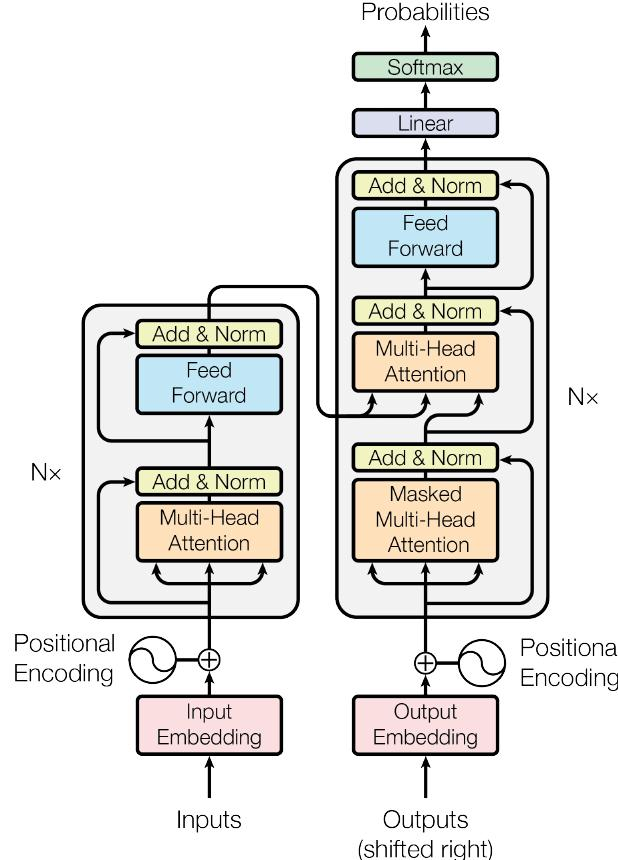

In [14]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[6])

In [15]:
images[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABWAFYDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3q5l8i3kk4yBxnpnt+tYV7qsdnaPcX92EhTks5AA/LrTby/8ANQzzttiTLqD0Xj/PPua8F8beLpfEmomOFnWwhOI0PG4/3iK8WeIeLqctNtRW/mdcafIry3NnxV8Ub7UJHttGLWlqCR5w/wBY49c/w/hXn0kskzl5HZ2PJLH

In [16]:
len(images)

73

# Semantic Chunking of Text

 Reference : https://github.com/FullStackRetrieval-com/RetrievalTutorials/blob/main/tutorials/LevelsOfTextSplitting/5_Levels_Of_Text_Splitting.ipynb



In [17]:
texts[0].text

"See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPanneer Selvam Viswanathan Institute of Electrical and Electronics Engineers 3 PUBLICATIONS 14 CITATIONS\n\nResearch Pub\n\n4379 PUBLICATIONS. 624 CITATIONS\n\nSEE PROFILE\n\nSEE PROFILE\n\nAll content following this page was uploaded by Research Pub on 20 January 2025.\n\nThe user has requested enhancement of the downloaded file.\n\nResearchGate\n\nInternational Journal of Computer Engineering and Technology (IJCET)\n\nInternational Journal of Computer Engineering and Technology (IJCET) Volume 16, Issue 1, Jan-Feb 2025, pp. 862-880, Article ID: IJCET_16_01_069 Available online at https://iaem

In [18]:
len(texts)

93

In [19]:
type(texts[9].text)

str

### Club all the text from texts into a single list of text

In [20]:
text_data =[]

for i in range(len(texts)):
    text_data.append(texts[i].text)
    

In [21]:
text_string= " ".join(text_data)

In [ ]:
#text_string

'See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPanneer Selvam Viswanathan Institute of Electrical and Electronics Engineers 3 PUBLICATIONS 14 CITATIONS\n\nResearch Pub\n\n4379 PUBLICATIONS. 624 CITATIONS\n\nSEE PROFILE\n\nSEE PROFILE\n\nAll content following this page was uploaded by Research Pub on 20 January 2025.\n\nThe user has requested enhancement of the downloaded file.\n\nResearchGate\n\nInternational Journal of Computer Engineering and Technology (IJCET)\n\nInternational Journal of Computer Engineering and Technology (IJCET) Volume 16, Issue 1, Jan-Feb 2025, pp. 862-880, Article ID: IJCET_16_01_069 Available online at https://iaem

In [23]:
len(text_string)

272834

#### Split the entire text_string into 1-sentence chunks.

In [24]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', text_string)
print (f"{len(single_sentences_list)} senteneces were found")

2071 senteneces were found


In [25]:
enumerate(single_sentences_list)

In [26]:
len(single_sentences_list)

2071

#### convert this list of sentences to list of doctionary  (List[dict])

In [27]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': 'See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPanneer Selvam Viswanathan Institute of Electrical and Electronics Engineers 3 PUBLICATIONS 14 CITATIONS\n\nResearch Pub\n\n4379 PUBLICATIONS.',
  'index': 0},
 {'sentence': '624 CITATIONS\n\nSEE PROFILE\n\nSEE PROFILE\n\nAll content following this page was uploaded by Research Pub on 20 January 2025.',
  'index': 1},
 {'sentence': 'The user has requested enhancement of the downloaded file.',
  'index': 2}]

##### Combine the sentence before and after so that we reduce noise and capture more of the relationships between sequential sentences

In [28]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [29]:
sentences[:3]

[{'sentence': 'See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPanneer Selvam Viswanathan Institute of Electrical and Electronics Engineers 3 PUBLICATIONS 14 CITATIONS\n\nResearch Pub\n\n4379 PUBLICATIONS.',
  'index': 0,
  'combined_sentence': 'See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPann

Now I want to get embeddings for the combined sentences, so we can get the distances between the groups of 3 and find breakpoints. I'll use OpenAI's embeddings for this

In [30]:
#from langchain.embeddings import OpenAIEmbeddings
#oaiembeds = OpenAIEmbeddings()

In [31]:
from langchain_huggingface import HuggingFaceEmbeddings
hf_embeddings = HuggingFaceEmbeddings()

Get the embeddings and do it in batches to make it quicker

In [32]:
embeddings = hf_embeddings.embed_documents([x['combined_sentence'] for x in sentences])

We have list of embeddings that we want to add to our list of dicts

In [33]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [34]:
#sentence

Get cosine distance between sequential embeddings pairs where the breakpoints are? Add "distance_to_next" as another key

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [36]:
distances, sentences = calculate_cosine_distances(sentences)

In [37]:
distances[:3]

[0.004361404047567019, 0.6475389528243547, 0.4735403441926822]

In [38]:
type(distances), len(distances)

(list, 2070)

#### Plot the distance

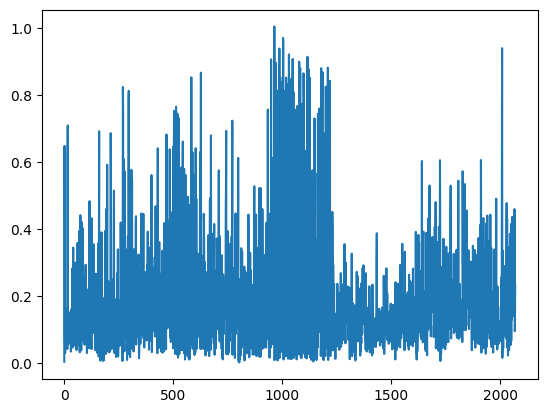

In [39]:
import matplotlib.pyplot as plt

plt.plot(distances);

There are many ways to chunk up the text based off these distances, but here we are going to consider any distance above the 85th percentile of distances as a break point. This is the only parameter we'll need to config.

I initially used 95 percentile but chunks size was too big be handled by open source qwen model


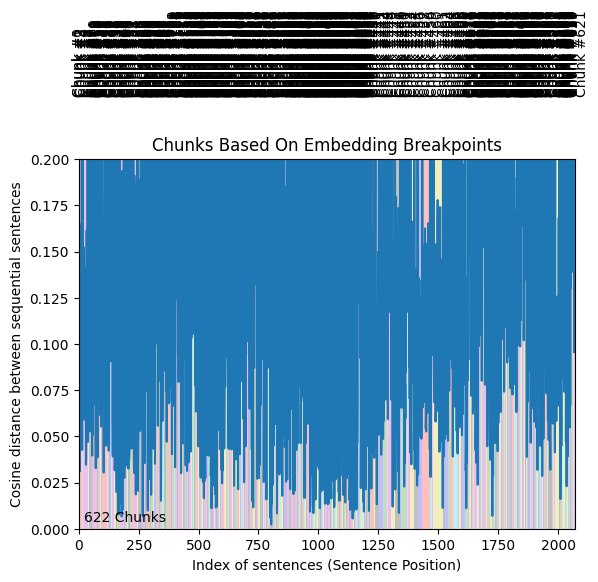

In [40]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 70
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

honestly hard to visulaize chunk here as we have used very large size data

Let's combine these sentences into chunks

In [41]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences


In [42]:
chunks[:1]

['See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,\n\nAGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS IN ARTIFICIAL INTELLIGENCE\n\nArticle in INTERNATIONAL JOURNAL OF COMPUTER ENGINEERING & TECHNOLOGY - January 2025 DOI: 10.34218/1JCET_16_01_069\n\nCITATIONS\n\nREADS\n\n4\n\n6,789\n\n2 authors:\n\nPanneer Selvam Viswanathan Institute of Electrical and Electronics Engineers 3 PUBLICATIONS 14 CITATIONS\n\nResearch Pub\n\n4379 PUBLICATIONS. 624 CITATIONS\n\nSEE PROFILE\n\nSEE PROFILE\n\nAll content following this page was uploaded by Research Pub on 20 January 2025.']

Manually inspect few elements 

In [43]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/388188752,

AGENTIC AI: A COMPREHENSIVE FRAMEWORK FOR AUTONOMOUS DECISION-MAKING SYSTEMS I
...
ronics Engineers 3 PUBLICATIONS 14 CITATIONS

Research Pub

4379 PUBLICATIONS. 624 CITATIONS

SEE PROFILE

SEE PROFILE

All content following this page was uploaded by Research Pub on 20 January 2025.


Chunk #1
The user has requested enhancement of the downloaded file.
...
The user has requested enhancement of the downloaded file.




In [44]:
len(chunks)

622

## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use open source models available on Groq.

In [45]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser


# Prompt

In [46]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {chunk}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)
from langchain_openai import ChatOpenAI

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# Summary chain
model = ChatOpenAI(model="gpt-4o-mini")
#model = ChatGroq(temperature=0.5, model="deepseek-r1-distill-llama-70b")
#model = ChatGroq(temperature=0.5, model="qwen-qwq-32b")
#model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
#summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

summarize_chain = prompt | model | StrOutputParser()

In [47]:
import time
#from langchain.chains import LLMChain

# Example function to process text
def process_text_with_delay(chunks, chain, delay=1):
    results = []
    for chunk in chunks:
        try:
            # Process the chunk using the chain
            result = chain.invoke(chunk)
            results.append(result)
        except Exception as e:
            print(f"Error processing chunk: {e}")
        # Introduce delay to handle rate limits
        time.sleep(delay)
    return results

In [48]:
text_summaries = process_text_with_delay(chunks, summarize_chain, delay=1)

### save chunks as texts

In [49]:
texts = chunks

In [50]:
#text_summaries = summarize_chain.batch(chunks, {"max_concurrency": 3})

### Summarize text and table

In [51]:
#text_summaries

In [52]:
len(text_summaries)

622

In [53]:


# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [54]:
table_summaries # no data in table, so no summary

[]

### Image summaries

We will use gpt-4o-mini to produce the image summaries.

In [55]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


#image_summaries = chain.batch(images)

In [56]:

import time
from langchain.chains import LLMChain

# Example function to process images
def process_images_with_delay(images, chain, delay=1):
    results = []
    for image in images:
        try:
            # Process the image using the chain
            result = chain.invoke(image)
            results.append(result)
        except Exception as e:
            print(f"Error processing image: {e}")
        # Introduce delay to handle rate limits
        time.sleep(delay)
    return results

In [57]:
image_summaries = process_images_with_delay(images,chain, delay=1)

In [58]:
type(image_summaries)

list

In [59]:
len(images)

73

In [60]:
#image_summaries

## Load data and summaries to vectorstore


### Create the vectorstore

In [61]:
from astrapy import DataAPIClient

import os
from dotenv import load_dotenv
load_dotenv()

os.environ["ASTRA_DB_API_ENDPOINT"] = os.getenv("ASTRA_DB_API_ENDPOINT")
os.environ["ASTRA_DB_APPLICATION_TOKEN"] = os.getenv("ASTRA_DB_APPLICATION_TOKEN")

ASTRA_DB_API_ENDPOINT =os.getenv("ASTRA_DB_API_ENDPOINT")
ASTRA_DB_APPLICATION_TOKEN = os.getenv("ASTRA_DB_APPLICATION_TOKEN")

In [62]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

C:\Users\singh\AppData\Local\Temp\ipykernel_19008\2047715053.py:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


## AstraDBVector with Flat index

### for some reason the below cell started giving error and restrting the kernel, i will loose all the variables. So not trying to create different indexes as of now. 

In [64]:
from langchain_astradb import AstraDBVectorStore

# The vectorstore to use to index the child chunks
vectorstore= AstraDBVectorStore(
    collection_name="AgenticAI_Assignment_2",
    embedding=embeddings,
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    token=ASTRA_DB_APPLICATION_TOKEN,
    namespace=None,
    #index_type ="flat",
)

In [65]:
import uuid
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [66]:
# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

In [67]:
# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

### Load the summaries and link the to the original data

In [68]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

''' # Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables))) '''

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

In [69]:
#summary_texts

In [70]:
#summary_img

### Check retrieval

In [71]:
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)

In [72]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

3] Rafal Jozefowicz, Oriol Vinyals, Mike Schuster, Noam Shazeer, and Yonghui Wu.

--------------------------------------------------------------------------------


## RAG pipeline

In [73]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode
from langchain_core.output_parsers import StrOutputParser


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            #context_text += text_element.text
            context_text += text_element

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [76]:
chain.invoke("What is multihead?")

'Multihead refers to a mechanism in neural networks, specifically within the context of attention mechanisms, where multiple parallel attention layers, or "heads," are employed. Each head attends to different parts of the input representation and focuses on different subspaces of information. In the context provided, the multihead attention mechanism uses eight parallel attention heads, each with representations of a specific dimension, allowing the model to jointly focus on various aspects of the input data at different positions. The results from these heads are then concatenated and linearly projected to produce the final output.'